## Imports


In [2]:
from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

In [60]:
import os
import numpy as np
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [4]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## Get the Data

In [5]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [6]:
type(cifar10)
type(x_train_all)

numpy.ndarray

## Exploring the Data

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

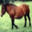

In [8]:
# to view the array of pixels as an image
pic = array_to_img(x_train_all[7])
display(pic)

In [9]:
# Image labels are in the y values
y_train_all.shape 

(50000, 1)

In [10]:
y_train_all[7][0]

7

In [11]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

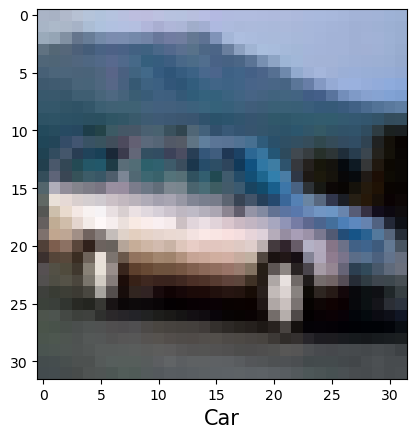

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize = 15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from the ```x_train_all```array in a row. Show the name of the label below the picture. Remove the tick marks. Hint: use matplotlib.

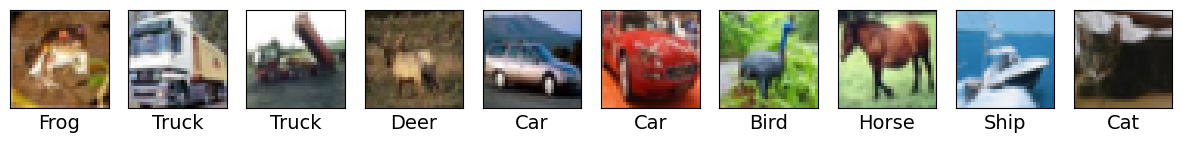

In [13]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [14]:
# Shows width, height, and channels (RGB channels)
x_train_all[0].shape


(32, 32, 3)

In [15]:
# Structure of the data
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [16]:
x_test.shape

(10000, 32, 32, 3)

## Preprocess Data

In [17]:
type(x_train_all[0][0][0][0]) # RGB value of a specific pixel

numpy.uint8

In [18]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 

In [19]:
x_train_all[0][0][0][0] # RGB value of a specific pixel

0.23137254901960785

In [20]:
# Flatten data, from 4 dimensions to 1 (row)
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [21]:
x_train_all.shape

(50000, 3072)

In [22]:
# Flatten testing dataset as well since training dataset was flattened
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [23]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays ```x_train``` and ```y_train``` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain thelast 40000 values from ```x_train_all``` and ```y_train_all``` respectivey.

In [24]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)
Simulate training on a smaller dataset before committing to a bigger dataset

In [25]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## Define the Neural Network using Keras

In [26]:
#relu = hidden layers
#softmax = output layer
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


c:\Users\tanic\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Dropout regularization
# from keras.layers import Dropout

model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

c:\Users\tanic\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# MODEL_3 IS AT THE BOTTOM!

In [28]:
type(model_1)

keras.src.models.sequential.Sequential

In [29]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden2 (Dense)              │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden3 (Dense)              │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_output (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,810 (1.54 MB)

 Trainable params: 402,810 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Total params calculation: 
# inputs * neurons + bias
32*32*3*128 + 128 + (128*64 +64) + (64*16 +16) + (16*10+10)

402810

# Tensorboad (visualizing learning)

In [31]:
def get_tensorboard(model_name):
    """
    Makes a new path and folder for visualizing learning
    """

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name) #Makes a new directory

    ## Try and excpet blocks
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [32]:
samples_per_batch = 1000

In [33]:
# nr_epochs = 150 
# model_1.fit(x_train_xs, y_train_xs,
#     batch_size=samples_per_batch,
#     epochs=nr_epochs,
#     callbacks=[get_tensorboard('Model 1')],
#     verbose=0,
#     validation_data=(x_val,y_val))

In [34]:
# nr_epochs = 150 
# model_2.fit(x_train_xs, y_train_xs,
#     batch_size=samples_per_batch,
#     epochs=nr_epochs,
#     callbacks=[get_tensorboard('Model 2')],
#     verbose=0,
#     validation_data=(x_val,y_val))

In [35]:
nr_epochs = 100 
model_1.fit(x_train, y_train,
    batch_size=samples_per_batch,
    epochs=nr_epochs,
    callbacks=[get_tensorboard('Model 1 XL')],
    verbose=0,
    validation_data=(x_val,y_val))

Successfully created directory


In [36]:
nr_epochs = 100 
model_2.fit(x_train, y_train,
    batch_size=samples_per_batch,
    epochs=nr_epochs,
    callbacks=[get_tensorboard('Model 2 XL')],
    verbose=0,
    validation_data=(x_val,y_val))

Successfully created directory


**Challenge:** Create a third model, ```model_3``` that has 2 dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%. 

In [37]:
# Dropout regularization
# from keras.layers import Dropout

model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m2_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m2_hidden2'))
model_3.add(Dense(16, activation='relu', name='m2_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m2_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [38]:
nr_epochs = 100 
model_3.fit(x_train, y_train,
    batch_size=samples_per_batch,
    epochs=nr_epochs,
    callbacks=[get_tensorboard('Model 3 XL')],
    verbose=0,
    validation_data=(x_val,y_val))

Successfully created directory


# Predictions on Individual Images

In [39]:
x_val.shape # 10,000 images with 3072 pixels per image

(10000, 3072)

In [40]:
# first image
x_val[0].shape

(3072,)

In [41]:
# Expand dimensions to be iterable
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [42]:
np.set_printoptions(precision=3) # changes sig figs

In [43]:
# Probabilities for each differenct class of image
model_2.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[1.348e-02, 2.194e-03, 1.363e-02, 1.238e-01, 5.388e-02, 3.063e-02,
        7.446e-01, 1.652e-02, 4.412e-04, 8.164e-04]], dtype=float32)

In [44]:
model_2.predict(x_val).shape 
# 10 predictions per image corresponding to the image classes 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(10000, 10)

In [45]:
# Show predicted class only
# model_2.predict_classes(test)
predict_x=model_2.predict(test)
classes_x=np.argmax(predict_x, axis=1)
print(classes_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[6]


In [46]:
# Confirm prediction above was correct
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset. 

In [47]:
for i in range(10):
    image = np.expand_dims(x_val[i], axis=0)
    prediction=model_2.predict(image)
    class_prediction=np.argmax(prediction, axis=1)

    print(f'Prediction is class {class_prediction[0]}')
    print(f'Actual image class is {y_val[i][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction is class 6
Actual image class is 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction is class 1
Actual image class is 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction is class 9
Actual image class is 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction is class 6
Actual image class is 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction is class 1
Actual image class is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction is class 7
Actual image class is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction is class 2
Actual image class is 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction is class 7
Actual image class is 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction is class 0
Actual image class is 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction is class 1
Actual image class is 3


# Evaluation

In [48]:
model_2.metrics_names

['loss', 'compile_metrics']

In [49]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.4992 - loss: 1.4125
Test loss is 1.42 and test accuracy is 49.7%


## Confusion Matrix

In [50]:
# from sklearn.metrics import confusion_matrix

predictions = np.argmax(model_2.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


In [51]:
conf_matrix.shape

(10, 10)

In [52]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [53]:
conf_matrix.max()

686

In [54]:
conf_matrix.min()

6

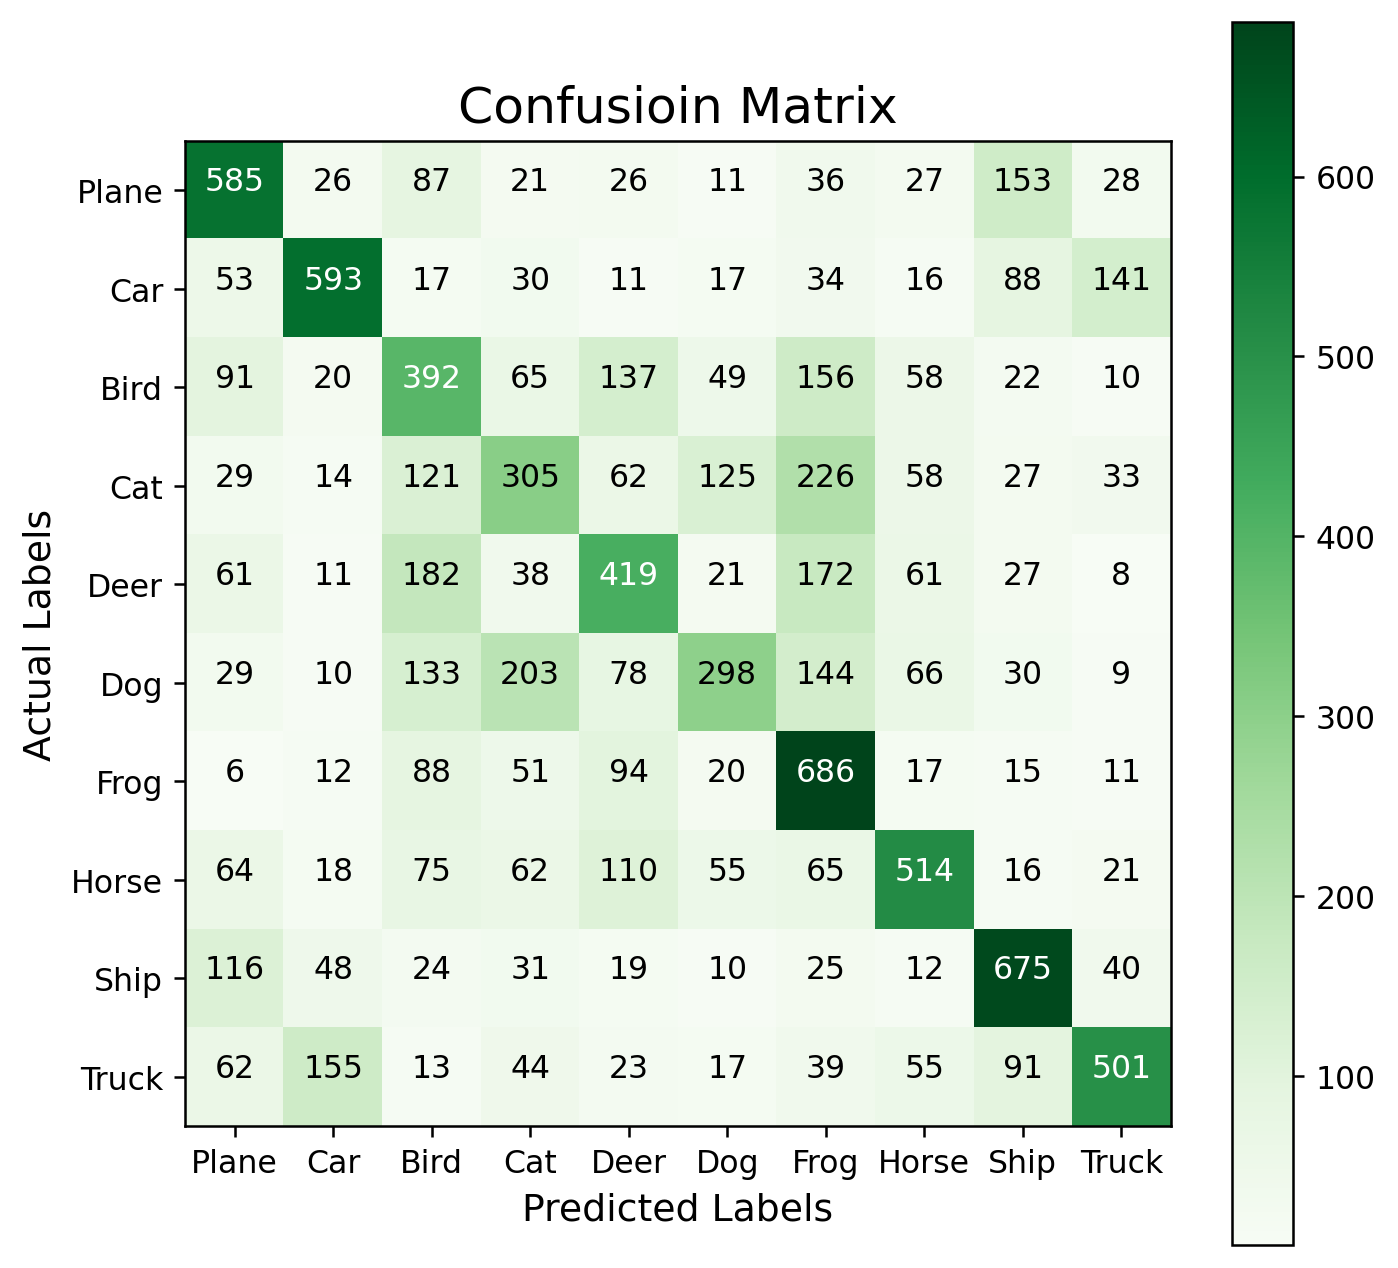

In [68]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusioin Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

# This is equivalent to a nested for loop
# Prints actual values in each cell
for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center',
             color='white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black')


plt.show()

**Challenge** What do the numbers down the diagonal represent? What do the other numbers (excluding the number in the diagonal) in a single row represent? Try to identify the false positives, false negatives, and the true positives in the confustion matrix. 

In [69]:
# True Positives
np.diag(conf_matrix)

array([585, 593, 392, 305, 419, 298, 686, 514, 675, 501], dtype=int64)

In [75]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1) # sum all columns
recall

array([0.585, 0.593, 0.392, 0.305, 0.419, 0.298, 0.686, 0.514, 0.675,
       0.501])

In [78]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis= 0) # sum all rows
precision

array([0.534, 0.654, 0.346, 0.359, 0.428, 0.478, 0.433, 0.581, 0.59 ,
       0.625])

In [80]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 49.68%


**Challenge**: Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole. 

In [81]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 50.29%


In [82]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 f score is 49.98%
